# Laboratorio 1

## Postgrado en Análisis y Predicción de Datos

### Universidad Galileo

#### Text Mining & Image Recognition

---

**Diego Morales**  
*13001893*

---

Este laboratorio aborda técnicas esenciales en el procesamiento de imágenes con Python. A continuación se resumen las actividades realizadas:

- **Extracción de Canales de Color:** Se desarrolló una función para visualizar imágenes destacando los canales de color rojo, verde, azul y sus combinaciones.

- **Fusión de Canales de Color:** Se implementó una función para combinar imágenes de los canales rojo, verde y azul en una sola imagen RGB.

- **Generación de Escalas de Grises:** Se creó una función que convierte una imagen RGB a escala de grises utilizando los valores de los canales de color y realiza guardado opcional de las imágenes resultantes.

- **Cálculo y Visualización de Histogramas:** Se calcularon y visualizaron los histogramas para los canales de color y la imagen en escala de grises, incluyendo líneas que representan la media de cada distribución.

- **Conversión a Escala de Grises con Ponderación:** Se desarrolló una función que convierte una imagen RGB a escala de grises aplicando una fórmula de ponderación específica para cada canal de color.

- **Espacio de Color HSV:** Se explicó el modelo de color HSV, su representación y conversión desde el espacio RGB, destacando la intuición detrás de matiz, saturación y valor.

In [214]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline 

## Problema 1

In [57]:
def color_channel(img, color):
    assert color in (1, 2, 3, 10, 20, 30), 'Ingrese un color válido'
    height = img.shape[0]
    width = img.shape[1]

    img_out = np.zeros_like(img)
    for y in range(height):
        for x in range(width):
            pixel = img[y, x]
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]

            match color:
                case 1:
                    img_out[y, x] = [0, 0, blue]
                case 2:
                    img_out[y, x] = [0, green, 0]
                case 3:
                    img_out[y, x] = [red, 0, 0]
                case 10:
                    img_out[y, x] = [red, green, 0]
                case 20:
                    img_out[y, x] = [0, green, blue]
                case 30:
                    img_out[y, x] = [red, 0, blue]
    return img_out
            

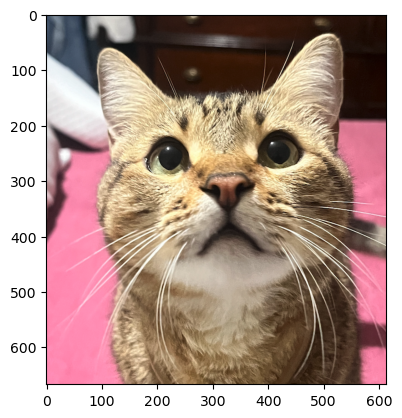

In [195]:
img = cv2.imread('whisky.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

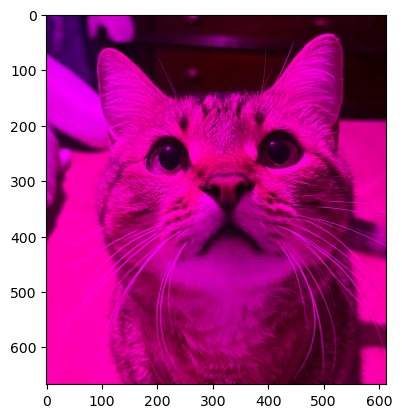

In [197]:
new_img = color_channel(img, 30)
plt.imshow(new_img)
plt.show()

## Problema 2

In [199]:
def merge_channels(img_r, img_g, img_b):
    assert img_r.shape == img_g.shape == img_b.shape, 'Las imágenes no son del mismo tamaño'
    height = img_r.shape[0]
    width = img_r.shape[1]

    img_out = np.zeros_like(img_r)
    for y in range(height):
        for x in range(width):
            red = img_r[y, x][0]
            green = img_g[y, x][0]
            blue = img_b[y, x][0]
            img_out[y, x] = [red, green, blue]
    return img_out

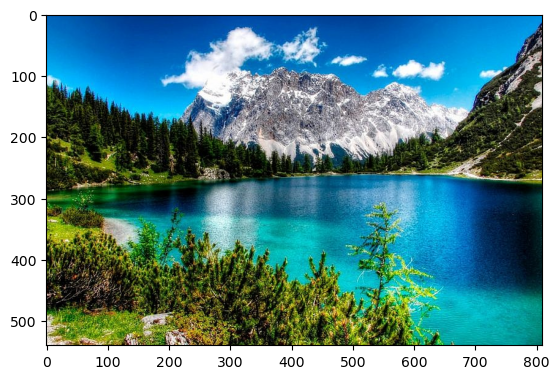

In [205]:
index = 0
filenames = ['imagen1_salida_gray', 'imagen2_salida_gray', 'perro_salida_gray']
filename = filenames[index]
folder = filename.split('_')[0]
img_r = cv2.imread(f'{folder}/{filename}_rojo.jpg')
img_g = cv2.imread(f'{folder}/{filename}_verde.jpg')
img_b = cv2.imread(f'{folder}/{filename}_azul.jpg')

img_merged = merge_channels(img_r, img_g, img_b)
plt.imshow(img_merged)
plt.show()

## Problema 3

In [224]:
def gray_scale(img, export=False):
    height = img.shape[0]
    width = img.shape[1]

    img_r_out = np.zeros_like(img)
    img_g_out = np.zeros_like(img)
    img_b_out = np.zeros_like(img)
    for y in range(height):
        for x in range(width):
            pixel = img[y, x]
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            img_r_out[y, x] = [red, red, red]
            img_g_out[y, x] = [green, green, green]
            img_b_out[y, x] = [blue, blue, blue]
    if export:
        timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
        cv2.imwrite(f'img_r_out_{timestamp}.jpg', img_r_out)
        cv2.imwrite(f'img_g_out_{timestamp}.jpg', img_g_out)
        cv2.imwrite(f'img_b_out_{timestamp}.jpg', img_b_out)
    return img_r_out, img_g_out, img_b_out

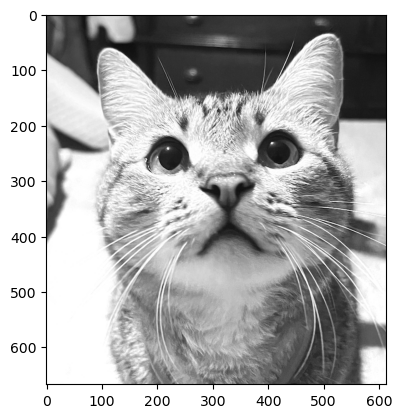

In [226]:
img = cv2.imread('whisky.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_r_out, img_g_out, img_b_out = gray_scale(img, True)
plt.imshow(img_r_out)
plt.show()

## Problema 4

In [294]:
def show_histogram(img):
    height = img.shape[0]
    width = img.shape[1]

    img_gray = np.zeros((height, width, 1), dtype=int)
    for y in range(height):
        for x in range(width):
            pixel = img[y, x]
            img_gray[y, x] = int(pixel.mean())

    hist_red = np.zeros(256, dtype=int)
    hist_green = np.zeros(256, dtype=int)
    hist_blue = np.zeros(256, dtype=int)
    hist_gray = np.zeros(256, dtype=int)

    for y in range(height):
        for x in range(width):
            red_value = img[y, x, 0]
            green_value = img[y, x, 1]
            blue_value = img[y, x, 2]
            gray_value = img_gray[y, x]
            
            hist_red[red_value] += 1
            hist_green[green_value] += 1
            hist_blue[blue_value] += 1
            hist_gray[gray_value] += 1

    mean_red = np.sum(hist_red * np.arange(256)) / np.sum(hist_red)
    mean_green = np.sum(hist_green * np.arange(256)) / np.sum(hist_green)
    mean_blue = np.sum(hist_blue * np.arange(256)) / np.sum(hist_blue)
    mean_gray = np.sum(hist_gray * np.arange(256)) / np.sum(hist_gray)


    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    axes[0, 0].bar(np.arange(256), hist_red, color='red', alpha=0.6)
    axes[0, 0].axvline(mean_red, color='red', linestyle='dashed', linewidth=2)
    
    axes[0, 1].bar(np.arange(256), hist_green, color='green', alpha=0.6)
    axes[0, 1].axvline(mean_green, color='green', linestyle='dashed', linewidth=2)
    
    axes[1, 0].bar(np.arange(256), hist_blue, color='blue', alpha=0.6)
    axes[1, 0].axvline(mean_blue, color='blue', linestyle='dashed', linewidth=2)

    axes[1, 1].bar(np.arange(256), hist_gray, color='gray', alpha=0.6)
    axes[1, 1].axvline(mean_gray, color='gray', linestyle='dashed', linewidth=2)

    plt.tight_layout()
    plt.show()

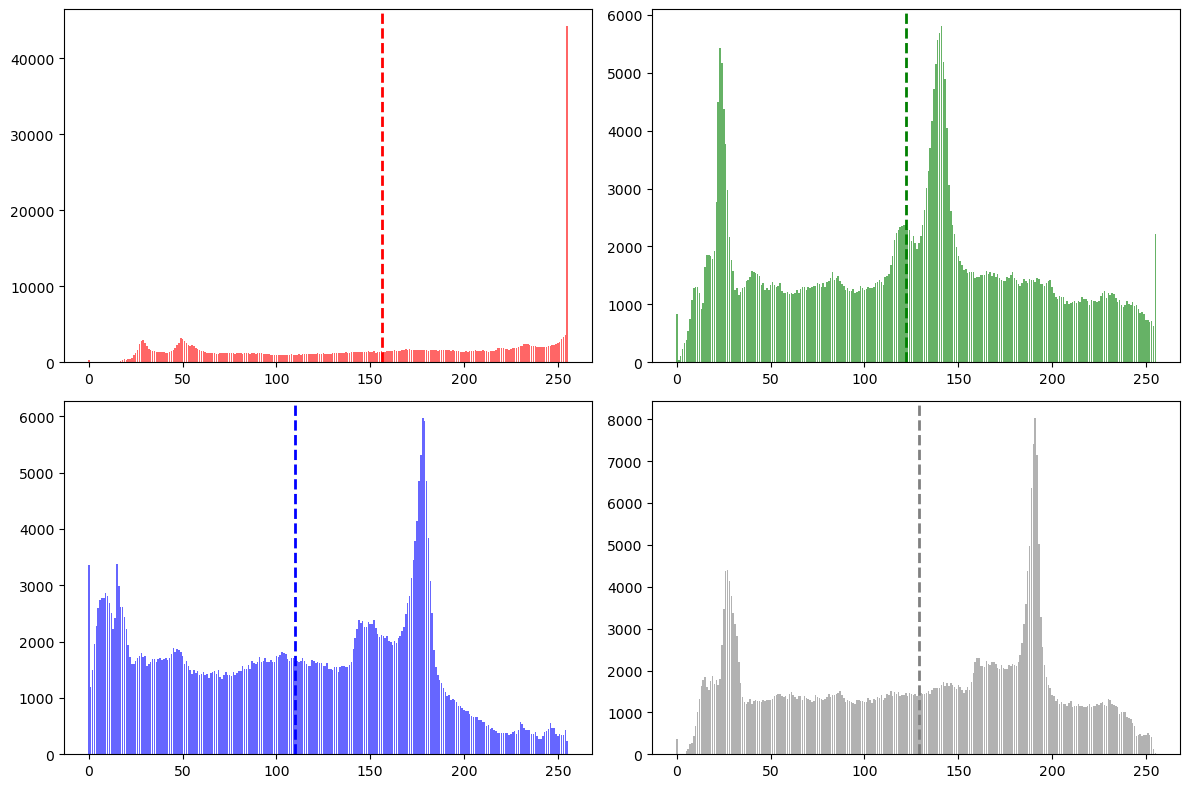

In [296]:
img = cv2.imread('whisky.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_histogram(img)

## Problema 5

In [313]:
def gray_pond(img):
    height = img.shape[0]
    width = img.shape[1]

    img_gray_pond = np.zeros((height, width, 1), dtype=int)
    for y in range(height):
        for x in range(width):
            pixel = img[y, x]
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            img_gray_pond[y, x] = int(0.3*red + 0.59*green + 0.11*blue)
            
    return img_gray_pond

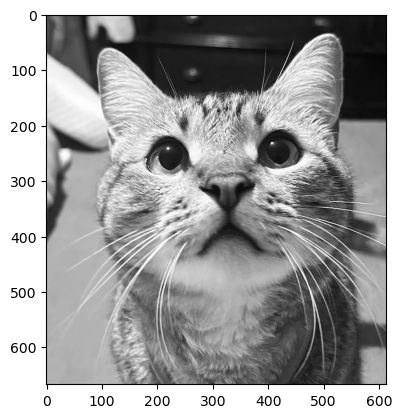

In [319]:
img = cv2.imread('whisky.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray_pond = gray_pond(img)
plt.imshow(img_gray_pond, cmap='gray')
plt.show()

## Problema 6

### Espacio de Color HSV

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que representa y describe colores de una manera que es más intuitiva para los humanos en comparación con el modelo RGB (Red, Green, Blue). Es utilizado en aplicaciones de edición de imágenes debido a su capacidad para representar colores de manera que se asemeja más a cómo los humanos perciben y describen los colores.

#### Componentes del Espacio de Color HSV

1. **Hue (Matiz):**
   - Representa el tipo de color (rojo, azul, verde, etc.).
   - Medido en grados, de 0 a 360.
   - 0° corresponde al rojo, 120° al verde y 240° al azul.

2. **Saturation (Saturación):**
   - Representa la pureza del color.
   - Medido como un porcentaje, de 0% a 100%.
   - 0% corresponde a un tono gris (sin color), mientras que 100% es el color completo.

3. **Value (Valor o Brillo):**
   - Representa la luminosidad del color.
   - Medido como un porcentaje, de 0% a 100%.
   - 0% es completamente negro y 100% es el brillo máximo del color.

#### Conversión de RGB a HSV

Para convertir un color del espacio RGB al espacio HSV, se siguen los siguientes pasos:

1. **Normalización:** Convertir los valores R, G y B de su rango habitual de [0, 255] a [0, 1].

    $
   R' = \frac{R}{255}, \quad G' = \frac{G}{255}, \quad B' = \frac{B}{255}
   $

2. **Cálculo de Máximos y mínimos (M, m)**

    $
   M = \max(R', G', B'), \quad m = \min(R', G', B')
   $

4. **Cálculo del Value (V):**

   $
   V = M
   $

5. **Cálculo de la Saturación (S):**
 
   $
   S = \frac{M - m}{m} \quad \text{si} \quad m \neq 0, \quad \text{de lo contrario} \quad S = 0
   $

6. **Cálculo del Matiz (H):**
   - Si $R' = M$:

     $
     H = 60^\circ \times \left(0 + \frac{G' - B'}{M - m}\right)
     $
     
   - Si $G' = M$:

     $
     H = 60^\circ \times \left(2 + \frac{B' - R'}{M - m}\right)
     $
     
   - Si $B' = M$:
     
     $
     H = 60^\circ \times \left(4 + \frac{R' - G'}{M - m}\right)
     $
     
   - Si $H < 0$, añadir $360°$.